In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from scipy.io import wavfile
from IPython.display import Audio
%matplotlib inline

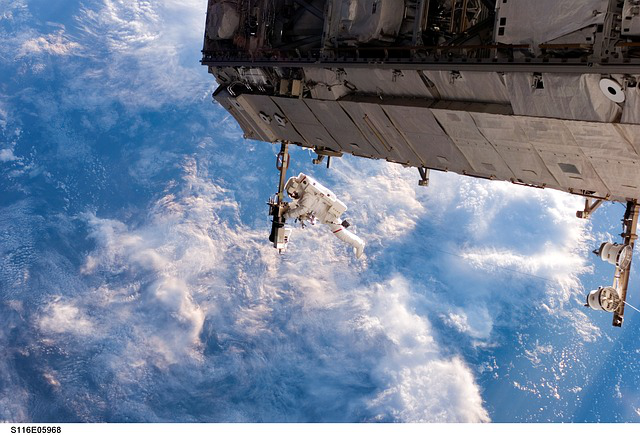

In [3]:
img = Image.open("../data/iss.jpg")
img

In [6]:
imgarray = np.asarray(img)
imgarray.shape

(435, 640, 3)

In [7]:
imgarray.ravel().shape

(835200,)

In [11]:
rate, snd = wavfile.read("../data/sms.wav")

In [14]:
rate

44100

In [15]:
type(snd)

numpy.ndarray

In [13]:
Audio(data=snd, rate=rate)

In [17]:
len(snd)

110250

In [18]:
snd

array([70, 14, 27, ..., 58, 68, 59], dtype=int16)

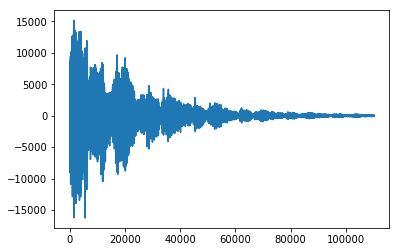

In [19]:
plt.plot(snd)

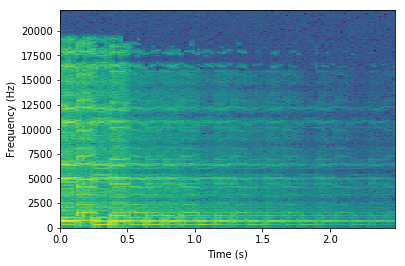

In [23]:
plt.specgram(snd,NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

In [24]:
df = pd.read_csv('../data/international-airline-passengers.csv')

In [25]:
df.columns

Index(['Month', 'Thousand Passengers'], dtype='object')

In [28]:
df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [32]:
df.describe()

,Thousand Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [33]:
df['Month'] = pd.to_datetime(df['Month'])

In [34]:
df.head()

,Month,Thousand Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [35]:
df.set_index('Month', inplace=True)

In [36]:
df.head()

,Thousand Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


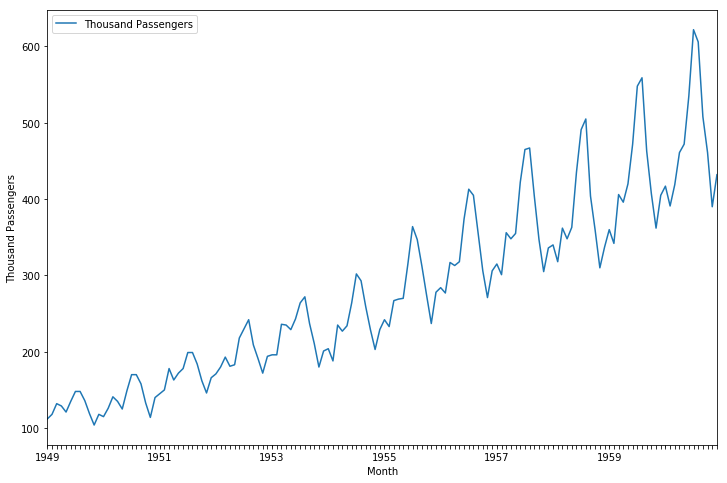

In [49]:
df.plot(figsize=(12,8), xticks=df.index)
plt.ylabel("Thousand Passengers");

In [50]:
df = pd.read_csv('../data/weight-height.csv')

In [52]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [54]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [62]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


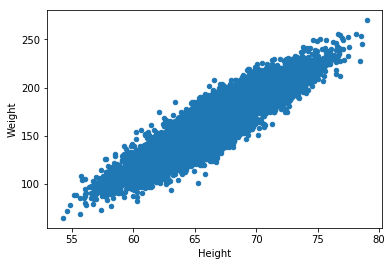

In [59]:
df.plot(kind="scatter", x='Height', y='Weight')

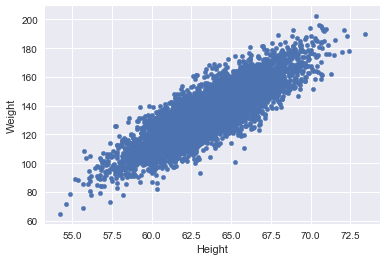

In [76]:
df[df['Gender']=='Female'].plot(kind="scatter", x='Height', y='Weight', )

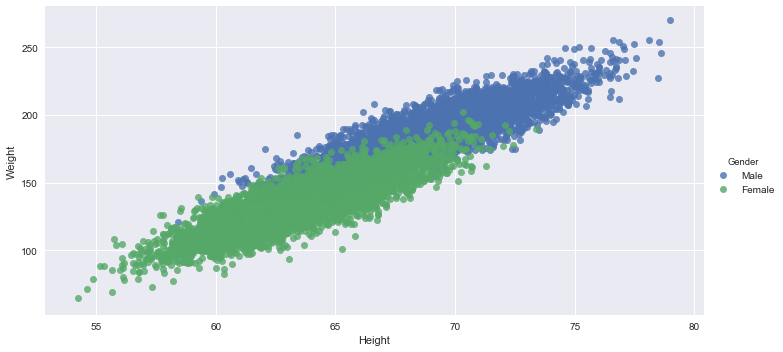

In [75]:
sns.lmplot(x='Height', y='Weight', data=df, hue='Gender', fit_reg=False, aspect=2)

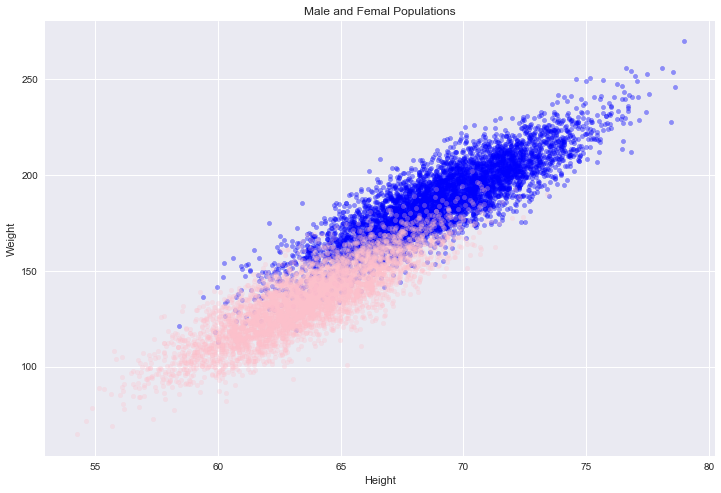

In [90]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']
fig, ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight', ax=ax, color='blue', alpha=0.4, title='Male and Femal Populations', figsize=(12,8))
females.plot(kind='scatter',x='Height',y='Weight', ax=ax, color='pink', alpha=0.3)

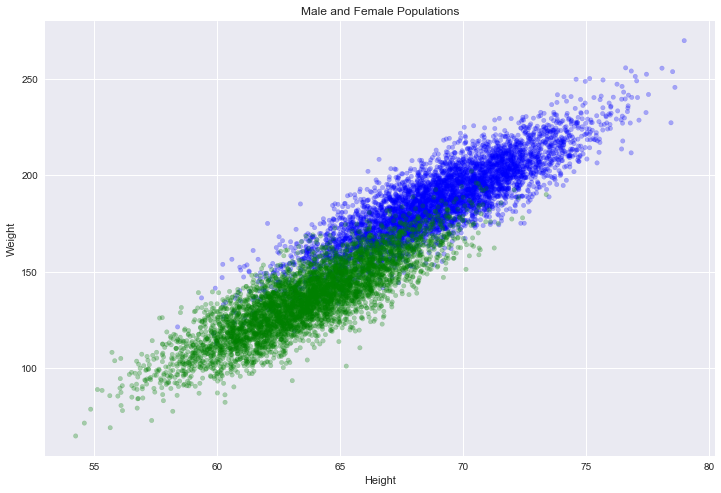

In [96]:
df['GenderColor'] = df['Gender'].map({'Male':'blue', 'Female':'green'})
df.plot(kind='scatter', x='Height', y='Weight', c=df['GenderColor'], alpha=0.3, 
        title='Male and Female Populations', figsize=(12,8));

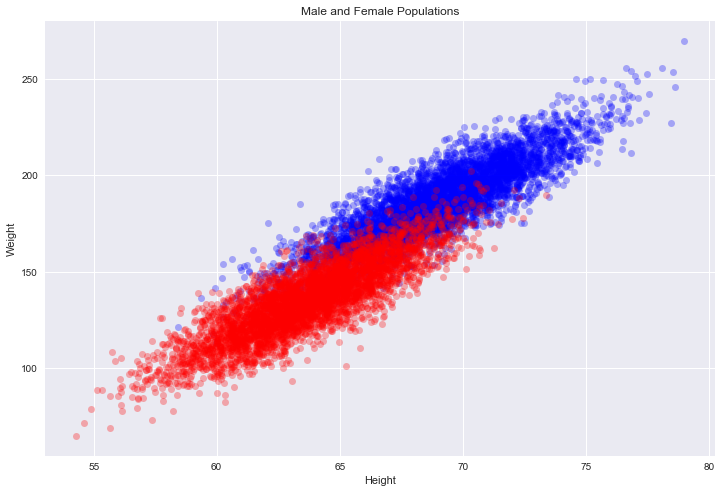

In [101]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(males['Height'], males['Weight'], 'bo', females['Height'], females['Weight'], 'ro', alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male and Female Populations')

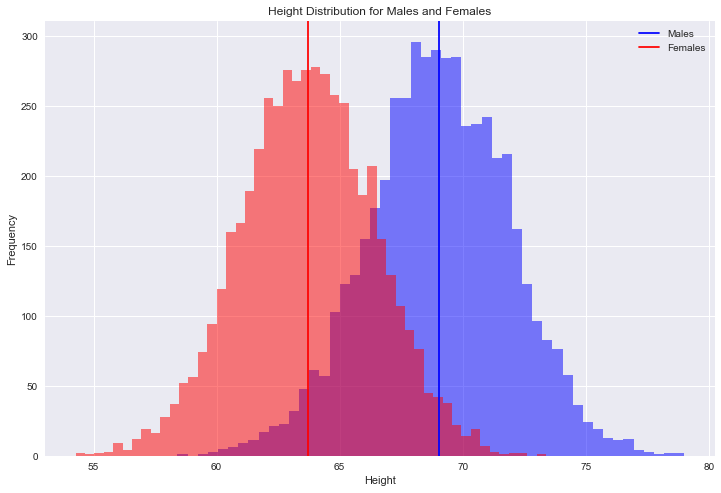

In [118]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(males['Height'], 50, alpha=0.5, facecolor='b');
ax.hist(females['Height'], 50, alpha=0.5, facecolor='r');
plt.axvline(males['Height'].mean(), color='b')
plt.axvline(females['Height'].mean(), color='r')
plt.title('Height Distribution for Males and Females')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend(['Males', 'Females'])

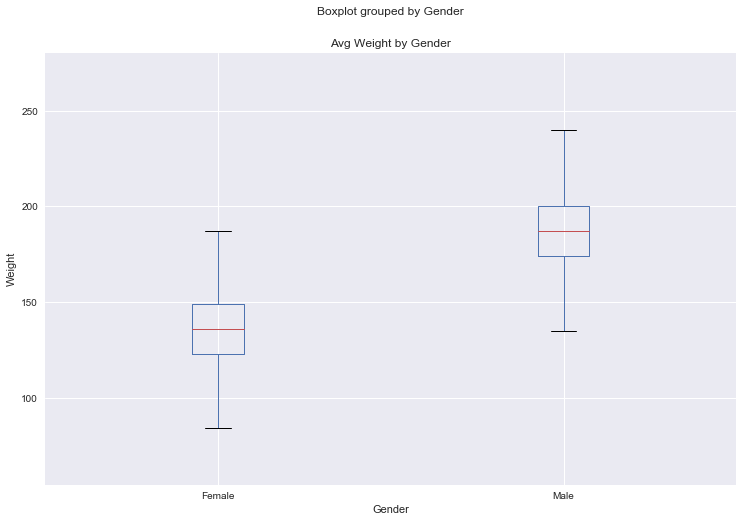

In [142]:
df.boxplot(column='Weight',by='Gender', figsize=(12,8))
plt.title('Avg Weight by Gender')
plt.ylabel('Weight')

In [154]:
df = pd.read_csv('../data/titanic-train.csv')

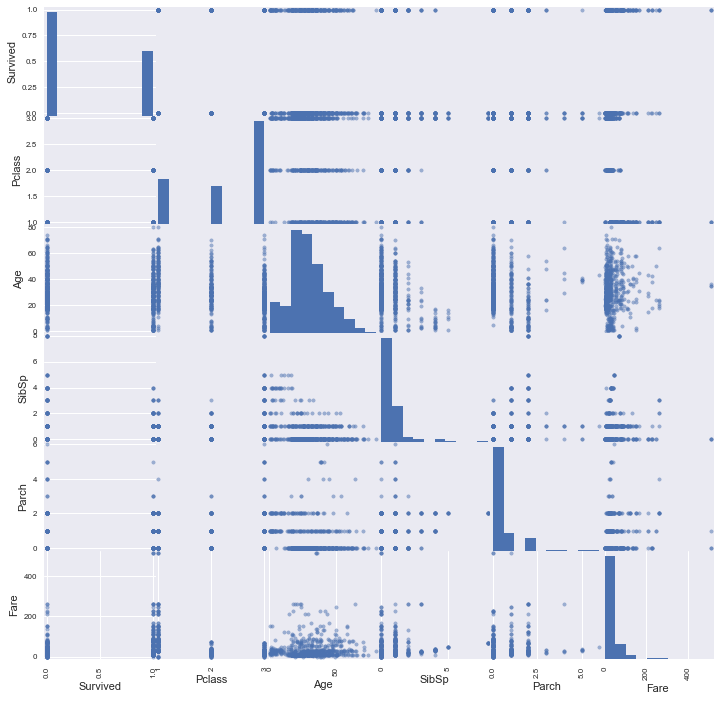

In [157]:
pd.scatter_matrix(df.drop('PassengerId', axis=1), alpha=0.5, figsize=(12,12));

In [164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
